In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### 훈련/검증/테스트 분리
from sklearn.model_selection import train_test_split

### 결정트리
from sklearn.tree import DecisionTreeClassifier

### 교차검증
from sklearn.model_selection import cross_validate

### 교차검증 -> KFold 라이브러리
from sklearn.model_selection import StratifiedKFold

### AutoML(그리드서치) 라이브러리
from sklearn.model_selection import GridSearchCV

### AutoML(랜덤서치) 라이브러리
from sklearn.model_selection import RandomizedSearchCV

### 랜덤서치에서 사용할 확률분포 데이터 생성 라이브러리
from scipy.stats import randint, uniform

### 로지스틱
from sklearn.linear_model import LogisticRegression

### 스케일링
from sklearn.preprocessing import StandardScaler


### SGD
from sklearn.linear_model import SGDClassifier

### 라이브러리
# 트위터 형태소 분석기
from konlpy.tag import Okt

# 워드 카운터(단어 빈도)
from collections import Counter

# 시각화
import matplotlib.pyplot as plt

# 워드클라우드 시각화
from wordcloud import WordCloud

# 한글처리
import platform

# 한글 폰트 패스 설정(운영체제 윈도우의 경우)
font_path = "c:/Windows/Fonts/malgun.ttf"


In [3]:
#######[파일명변경]#######
df = pd.read_csv("./data/model_review_result_from_0_to_52.csv")
#########################

### index 열 필터링
df = df.iloc[:,1:]

### 별점 숫자만 남기기 (type : object)
# - 별점없는 경우 -> NaN
df["rating"] = df["rating"].str.extract(r"(\d+)")

### 방문횟수 숫자만 남기기 (type : int)
df["visit"] = df["visit"].str.replace("번째 방문", "").astype(int)

### 날짜 전처리 (type : datetime)
date_slice = df["date"].str.extract(r"(\d{4})년 (\d{1,2})월 (\d{1,2})일")
df["date"] = pd.to_datetime(date_slice[0]+"-"+date_slice[1]+"-"+date_slice[2])

### 인증수단 값만 남기기
# - 컬럼명 recepit -> register 변경
df["receipt"] = df["receipt"].str.replace("인증 수단","")
df.rename(columns={"receipt":"register"}, inplace=True)

### 카테고리 문자열만 남기기
df["category"] = df["category"].str.extract(r"<span class=\"DJJvD\">(.*)</span>")

df 

,restaurant_name,review_content,rating,date,visit,register,category
0,가야동세연정,원래 부산에서 가던 갈비탕 집이 있는데 오늘은 다른 곳을 검색해서 방문!! 주변에...,NaN,2023-06-06,1,영수증,한식
1,가야동세연정,5년 전 부터 갈비탕하면 세연정에서만 먹었습니다. 다른 곳은 갈비탕 시키면 뜯다 만...,NaN,2023-05-01,1,영수증,한식
2,가야동세연정,이 맛이 어떤맛일까 궁금하시겠지만 우리가 늘 알던 갈비탕맛과는 사뭇 달랐어요! 시원...,NaN,2023-04-17,1,영수증,한식
3,가야동세연정,건더기까지 먹기엔 더운 날.\n가야에 오면 가끔 먹으러 옵니다.,NaN,2023-07-26,4,영수증,한식
4,가야동세연정,일욜에 아점먹으로 자주가는곳입니다 오늘은 왜 이럴까요...--...가위가 지저분하네...,NaN,2023-06-18,4,영수증,한식
...,...,...,...,...,...,...,...
9423,초읍동사랑채,음식이 깔금,NaN,2022-06-15,1,영수증,한식
9424,초읍동사랑채,좋아요,NaN,2022-01-29,1,영수증,한식
9425,초읍동사랑채,굿,NaN,2022-05-30,1,영수증,한식
9426,초읍동사랑채,.,NaN,2022-06-24,1,영수증,한식


In [4]:
model_rdf= df

In [5]:
model_rdf

,restaurant_name,review_content,rating,date,visit,register,category
0,가야동세연정,원래 부산에서 가던 갈비탕 집이 있는데 오늘은 다른 곳을 검색해서 방문!! 주변에...,NaN,2023-06-06,1,영수증,한식
1,가야동세연정,5년 전 부터 갈비탕하면 세연정에서만 먹었습니다. 다른 곳은 갈비탕 시키면 뜯다 만...,NaN,2023-05-01,1,영수증,한식
2,가야동세연정,이 맛이 어떤맛일까 궁금하시겠지만 우리가 늘 알던 갈비탕맛과는 사뭇 달랐어요! 시원...,NaN,2023-04-17,1,영수증,한식
3,가야동세연정,건더기까지 먹기엔 더운 날.\n가야에 오면 가끔 먹으러 옵니다.,NaN,2023-07-26,4,영수증,한식
4,가야동세연정,일욜에 아점먹으로 자주가는곳입니다 오늘은 왜 이럴까요...--...가위가 지저분하네...,NaN,2023-06-18,4,영수증,한식
...,...,...,...,...,...,...,...
9423,초읍동사랑채,음식이 깔금,NaN,2022-06-15,1,영수증,한식
9424,초읍동사랑채,좋아요,NaN,2022-01-29,1,영수증,한식
9425,초읍동사랑채,굿,NaN,2022-05-30,1,영수증,한식
9426,초읍동사랑채,.,NaN,2022-06-24,1,영수증,한식


In [6]:
#######[파일명변경]#######
df = pd.read_csv("./data/model_cat_result_from_0_to_52.csv")
#########################

### index 열 필터링
df = df.iloc[:,1:]
### "" 쌍따옴표 제거
df["naver_cat_review"] = df["naver_cat_review"].str.extract(r"\"(.+)\"")
### 각 키워드 선택 횟수의 숫자만 남기기 (type : int)
df["naver_cat_count"] = df["naver_cat_count"].str.replace("이 키워드를 선택한 인원","").astype(int)
### 키워드 참여수 숫자만 남기기 (type : int)
df["cat_people"] = df["cat_people"].str.replace(",","").str.extract(r"(\d+)명").astype(int)

df

FileNotFoundError: [Errno 2] No such file or directory: './model_cat_result_from_0_to_52.csv'

In [35]:
model_cdf=df

In [36]:
model_cdf

,restaurant_name,ansim,naver_cat_review,naver_cat_count,cat_people
0,가야동세연정,없음,음식이 맛있어요,472,636
1,가야동세연정,없음,매장이 넓어요,192,636
2,가야동세연정,없음,주차하기 편해요,175,636
3,가야동세연정,없음,단체모임 하기 좋아요,168,636
4,가야동세연정,없음,친절해요,153,636
...,...,...,...,...,...
656,초읍동사랑채,안심식당,매장이 넓어요,4,122
657,초읍동사랑채,안심식당,주차하기 편해요,2,122
658,초읍동사랑채,안심식당,좌석이 편해요,1,122
659,초읍동사랑채,안심식당,혼밥하기 좋아요,1,122


In [37]:
#######[파일명변경]#######
df = pd.read_csv("./data/review_concat_rating_revised.csv")
#########################

all_rdf = df

In [38]:
all_rdf

,Unnamed: 0,restaurant_name,review_content,rating,date,visit,register,category
0,0,전포동 베이비치크,아기자기하고 빈티지한 분위기가 좋았어요ㅎㅎ 명란청양오일파스타랑 트러플버섯크림리조또 ...,NaN,2023-08-02,1,영수증,양식
1,1,전포동 베이비치크,입구부터 이쁜 공간이 너무 많아서 좋았던 이곳 취향저격 제대로 당해서 안으로 들어왔...,NaN,2023-08-01,1,영수증,양식
2,2,전포동 베이비치크,와..오랜만에 너무 만족스러운 식사하고 왔어여ㅠ 매장 분위기도 너무 좋고 예쁘신 사...,NaN,2023-07-24,1,영수증,양식
3,3,전포동 베이비치크,지난번에 너무 맛있게 먹고 이번에 재방문했어요! 베이비치크 플레이트는 진짜 무조건 ...,NaN,2023-08-09,1,영수증,양식
4,4,전포동 베이비치크,양 진짜 많고 너무 맛있어요ㅠㅠ 안에도 아기자기 앤티크하게 잘 꾸며져있고ㅠㅠㅠ 감성...,NaN,2023-07-05,1,영수증,양식
...,...,...,...,...,...,...,...,...
116259,116259,양정동 명심이족발,맛있어요,5.0,2020-12-19,1,영수증,"족발,보쌈"
116260,116260,양정동 명심이족발,맛있고 양도 많았어요!,5.0,2020-12-25,2,영수증,"족발,보쌈"
116261,116261,양정동 명심이족발,좋아요,3.5,2020-10-29,1,영수증,"족발,보쌈"
116262,116262,양정동 명심이족발,맛있어요,3.5,2019-12-15,1,영수증,"족발,보쌈"


In [39]:
#######[파일명변경]#######
df = pd.read_csv("./cat_concat.csv")
#########################
all_cdf =df

In [40]:
all_cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18450 entries, 0 to 18449
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        18450 non-null  int64 
 1   restaurant_name   18450 non-null  object
 2   ansim             18450 non-null  object
 3   naver_cat_review  18450 non-null  object
 4   naver_cat_count   18450 non-null  int64 
 5   cat_people        18450 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 865.0+ KB


In [41]:
# 모범업소 재방문 횟수
model_average_visit= model_rdf['visit'].mean()
model_average_visit

1.7313322019516335

In [42]:
# 전체업소 재방문 횟수
all_average_visit= all_rdf['visit'].mean()
all_average_visit

1.5621172503956513

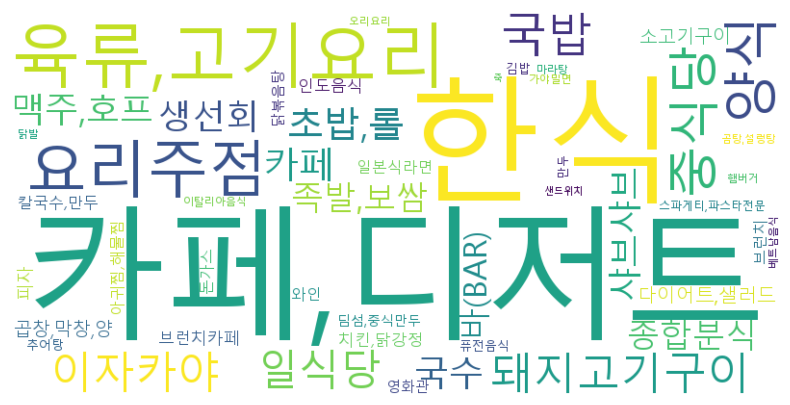

In [43]:
# 전체 업소 카테고리별 워드클라우드

category_counts = all_rdf['category'].value_counts()

category_count_dict = category_counts.to_dict()


wordcloud = WordCloud(width=800, height=400, background_color='white',
                      font_path=font_path, max_words=50).generate_from_frequencies(category_count_dict)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
all_cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18450 entries, 0 to 18449
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        18450 non-null  int64 
 1   restaurant_name   18450 non-null  object
 2   ansim             18450 non-null  object
 3   naver_cat_review  18450 non-null  object
 4   naver_cat_count   18450 non-null  int64 
 5   cat_people        18450 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 865.0+ KB


In [53]:
#전체 업소 키워드 참여자수
all_cdf['cat_people'].mean()

198.83647696476964

In [54]:
#모범 럽소 키워드 참여자수
model_cdf['cat_people'].mean()

345.0877458396369